In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Load data
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
#clean data by removing empty rows and only potable water 
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')
df.dropna(subset=['Sulfate', 'ph'], inplace=True)
df1 = df[df['Potability']== 1]
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [13]:
#process data by adding new columns
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')

Ph        = 'ph'
conditions  = [ df[Ph] > 8.6 , (df[Ph] < 8.5) & (df[Ph]> 6.5), df[Ph] < 6.4 ]
choices     = [ "Alkalic", 'Drinkable', 'Acidic' ]
df["Drinkable ph"] = np.select(conditions, choices, default=np.nan)

Hard        = 'Hardness'
conditionsA  = [ df[Hard] > 170 , df[Hard] < 169 ]
choicesA     = [ "Dangerous", 'Drinkable' ]
df["Drinkable Hardness"] = np.select(conditionsA, choicesA, default=np.nan)

df.dropna(subset=['Sulfate', 'ph'], inplace=True)
df1 = df[df['Potability']== 1]
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Drinkable ph,Drinkable Hardness
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1,Alkalic,Drinkable
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1,Alkalic,Drinkable
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1,Drinkable,Dangerous
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1,Drinkable,Dangerous
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1,Drinkable,Dangerous
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,Alkalic,Dangerous
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,Drinkable,Dangerous
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,Alkalic,Drinkable
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,Acidic,Dangerous


In [14]:
#process data by adding new columns
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')

Ph        = 'ph'
conditions  = [ df[Ph] > 8.6 , (df[Ph] < 8.5) & (df[Ph]> 6.5), df[Ph] < 6.4 ]
choices     = [ "Alkalic", 'Drinkable', 'Acidic' ]
df["Drinkable ph"] = np.select(conditions, choices, default=np.nan)

Hard        = 'Hardness'
conditionsA  = [ df[Hard] > 170 , df[Hard] < 169 ]
choicesA     = [ "Dangerous", 'Drinkable' ]
df["Drinkable Hardness"] = np.select(conditionsA, choicesA, default=np.nan)

df.dropna(subset=['Sulfate', 'ph'], inplace=True)
df1 = df[df['Potability']== 1]
df1
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,811.000000,847.000000,847.0
mean,7.111142,195.667130,22521.139329,7.151988,332.371701,424.519415,14.302758,66.581596,3.984994,1.0
std,1.457023,35.871991,8954.517902,1.728443,47.281757,81.510355,3.264260,16.297713,0.774796,0.0
min,0.227499,47.432000,1198.943699,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.249537,174.200575,15906.442722,6.061352,301.879095,360.016698,12.124666,55.751069,3.433837,1.0
50%,7.044375,197.617494,21379.963927,7.172920,331.145621,420.830866,14.250875,66.612984,4.003547,1.0
75%,7.943529,218.249178,28013.659746,8.158151,364.991885,481.110159,16.575130,77.372587,4.523965,1.0
max,13.175402,317.338124,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [15]:
#process data by adding new columns, and replacing potability 1 to Drinkable.
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')

Ph        = 'ph'
conditions  = [ (df[Ph] < 8.5) & (df[Ph]> 6.5), (df[Ph] > 8.5) | (df[Ph]< 6.5)]
choices     = [ 'Favorable', 'Concern' ]
df["Drinkable ph"] = np.select(conditions, choices, default=np.nan)

Hard        = 'Hardness'
conditionsA  = [ df[Hard] > 170 , df[Hard] < 169 ]
choicesA     = [ "Heavy", 'Favorable' ]
df["Drinkable Hardness"] = np.select(conditionsA, choicesA, default=np.nan)

df.dropna(subset=['Sulfate', 'ph'], inplace=True)
df1 = df[df['Potability']== 1]
df1["Potability"].replace({1:"Drinkable"}, inplace=True)
df1

C:\Users\IP\miniconda3\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Drinkable ph,Drinkable Hardness
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,Drinkable,Concern,Favorable
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,Drinkable,Concern,Favorable
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,Drinkable,Favorable,Heavy
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,Drinkable,Favorable,Heavy
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,Drinkable,Favorable,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,Drinkable,Concern,Heavy
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,Drinkable,Favorable,Heavy
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,Drinkable,Concern,Favorable
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,Drinkable,Concern,Heavy


In [16]:
#Wrangle Data by Merge other data sources into my dataset
df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')
df1 = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability_clean.csv')
df2 = pd.concat([df,df1], ignore_index=True)

Ph        = 'ph'
conditions  = [ (df2[Ph] < 8.5) & (df2[Ph]> 6.5), (df2[Ph] > 8.5) | (df[Ph]< 6.5)]
choices     = [ 'Favorable', 'Concern' ]
df2["Drinkable ph"] = np.select(conditions, choices, default=np.nan)

Hard        = 'Hardness'
conditionsA  = [ df2[Hard] > 170 , df2[Hard] < 169 ]
choicesA     = [ "Heavy", 'Favorable' ]
df2["Drinkable Hardness"] = np.select(conditionsA, choicesA, default=np.nan)

df2.dropna(subset=['Sulfate', 'ph'], inplace=True)
df2 = df2[df2['Potability']== 1]
df2["Potability"].replace({1:"Drinkable"}, inplace=True)
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Drinkable ph,Drinkable Hardness
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,Drinkable,Concern,Favorable
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,Drinkable,Concern,Favorable
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,Drinkable,Favorable,Heavy
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,Drinkable,Favorable,Heavy
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,Drinkable,Favorable,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...
5282,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,Drinkable,Concern,Heavy
5283,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,Drinkable,Favorable,Heavy
5284,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,Drinkable,Concern,Favorable
5285,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,Drinkable,nan,Heavy


In [17]:
#Method Chaining and writing Python programs
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability.csv')
df1 = pd.read_csv('C:/Users/IP/project-group47_project/data/water_potability_clean.csv')
df2 = pd.concat([df,df1], ignore_index=True)

Ph        = 'ph'
conditions  = [ (df2[Ph] < 8.5) & (df2[Ph]> 6.5), (df2[Ph] > 8.5) | (df[Ph]< 6.5)]
choices     = [ 'Favorable', 'Concern' ]
df2["Drinkable ph"] = np.select(conditions, choices, default=np.nan)

Hard        = 'Hardness'
conditionsA  = [ df2[Hard] > 170 , df2[Hard] < 169 ]
choicesA     = [ "Heavy", 'Favorable' ]
df2["Drinkable Hardness"] = np.select(conditionsA, choicesA, default=np.nan)

df2.dropna(subset=['Sulfate', 'ph'], inplace=True)
df2 = df2[df2['Potability']== 1]
df2["Potability"].replace({1:"Drinkable"}, inplace=True)

df3 = (df2.rename(columns={"ph": "pH"})
      .assign(Quality_Check=lambda x: np.where((x.Potability == "Drinkable") & (x.pH > 6.5) & (x.pH < 8.5), 1, 0))
      .loc[:, ["Solids", "Potability"]]
      .sort_values("Solids", ascending=True)
      .reset_index(drop=True)
      )

df3

,Solids,Potability
0,1198.943699,Drinkable
1,1198.943699,Drinkable
2,1351.906979,Drinkable
3,1351.906979,Drinkable
4,1372.091043,Drinkable
...,...,...
1653,53735.899194,Drinkable
1654,56351.396304,Drinkable
1655,56351.396304,Drinkable
1656,56488.672413,Drinkable


In [18]:
dfP = (df1.groupby('Solids')['Potability'].mean().sort_values(ascending=False).to_frame()
      )
dfP

,Potability
Solids,
56488.672413,1.0
17862.369003,1.0
28170.885101,1.0
17941.811256,1.0
28141.216497,1.0
...,...
19207.311771,0.0
19185.791877,0.0
19168.526773,0.0


In [19]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Drinkable ph,Drinkable Hardness
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,Drinkable,Concern,Favorable
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,Drinkable,Concern,Favorable
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,Drinkable,Favorable,Heavy
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,Drinkable,Favorable,Heavy
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,Drinkable,Favorable,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...
5282,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,Drinkable,Concern,Heavy
5283,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,Drinkable,Favorable,Heavy
5284,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,Drinkable,Concern,Favorable
5285,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,Drinkable,nan,Heavy


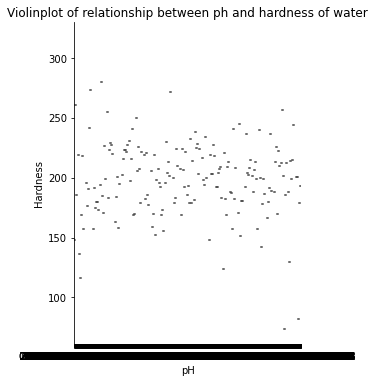

In [20]:
p4 = sns.catplot(x="ph", y="Hardness", kind="violin", data=df1, legend=True, 
                 palette = ['lightsalmon', 'lightseagreen']
                 ).set(title='Scatter plot of relationship between ph and hardness of water',
                      xlabel= 'pH', 
                      ylabel='Hardness')
plt.show()

## Task 4

## Research Question: What is the mean vlaue of factors which effects on water quality and the drinkable factors, are the water bank on data is safe to drink?

In [22]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Drinkable ph,Drinkable Hardness
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,Drinkable,Concern,Favorable
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,Drinkable,Concern,Favorable
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,Drinkable,Favorable,Heavy
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,Drinkable,Favorable,Heavy
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,Drinkable,Favorable,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...
5282,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,Drinkable,Concern,Heavy
5283,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,Drinkable,Favorable,Heavy
5284,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,Drinkable,Concern,Favorable
5285,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,Drinkable,nan,Heavy


In [30]:
df_mean = df2[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes', 'Turbidity']].mean()
df_mean

ph                     7.082973
Hardness             196.216807
Solids             21977.329624
Chloramines            7.126865
Sulfate              333.529822
Conductivity         426.327322
Organic_carbon        14.312638
Trihalomethanes       66.398085
Turbidity              3.967905
dtype: float64

#### drinkable water ph: 6.5–8.5
#### drinkable water Hardness: 120 to 170 mg/L
#### drinkable water Solids: 600 and 900 mg/litre
#### drinkable water Chloramines: 4 milligrams per liter (mg/L)
#### drinkable water Sulfate: 0 to 1,000 mg/L
#### drinkable water Conductivity: 200 to 800 µS/cm
#### drinkable water Organic carbon: 4 mg/L for source water
#### drinkable water Trihalomethanes: Critical if above 100 ml
#### drinkable water Turbidity: 1 NTU

### Conclusion: Most of requirement does not meet the minimum requirement of drinkable water. Thuse, most of water bank collected in database are not drinkable. (Hardness, Solids, Chloramines, Organic Carbon and Turbidity are the factors which does not meet the requirement.